# CS 4372.501.F22-Assignment 2
## Noah Khan and Ian Lunt

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

### PREPROCESSING AND ATTRIBUTE ANALYSIS

In [ ]:
# load the dataset
heartData = pd.read_csv("https://raw.githubusercontent.com/noahk587/CS-4372-Assignment-2-Classifiers/main/heart.csv", sep= ",")

In [ ]:
# output the head of the dataset to get an overview
heartData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# check for null data
pd.isnull(heartData)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
heartData.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# examine the attributes
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


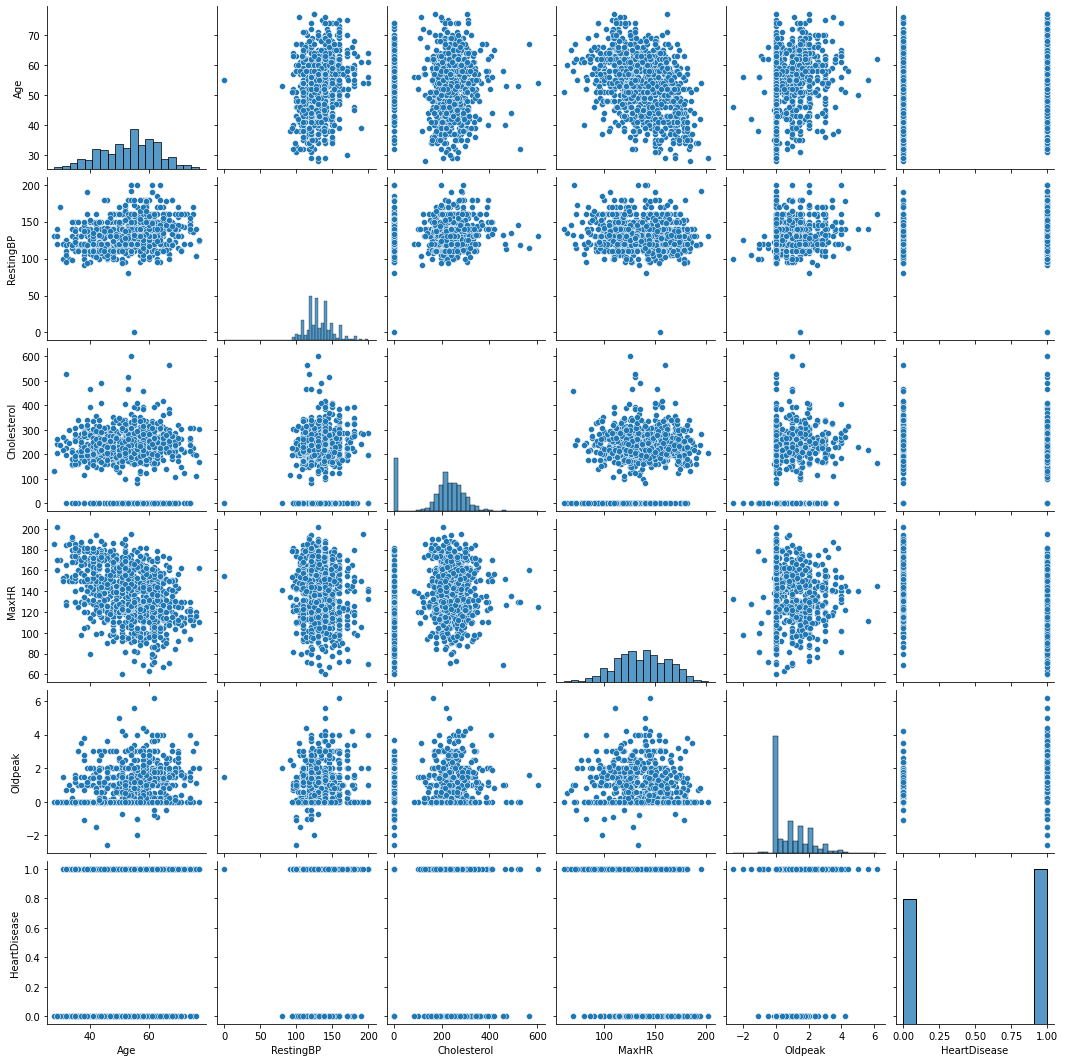

In [ ]:
# plot of variables
noncatcols = [ 
    'Age',
    'RestingBP',
    'Cholesterol',
    'MaxHR',
    'Oldpeak',
    'HeartDisease'] # response variable

catcols = [ 
    'Sex',
    'ChestPainType',
    'FastingBS',
    'RestingECG',
    'ExerciseAngina',
    'ST_Slope',
    'HeartDisease'] # response variable


import seaborn as sns

sns.pairplot(heartData[noncatcols])

In [ ]:
# Here we want to see of the categorical variables, how many levels do they have
heartData['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [ ]:
heartData['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [ ]:
heartData['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [ ]:
heartData['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [ ]:
heartData['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [ ]:
heartData['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
# the response variable
heartData['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
# get overview of columns
cols = ['Age',
        'Sex',
        'ChestPainType',
        'RestingBP',
        'Cholesterol',
        'FastingBS',
        'RestingECG',
        'MaxHR',
        'ExerciseAngina',
        'Oldpeak',
        'ST_Slope',
        'HeartDisease']

In [ ]:
heartData[cols].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
mm = MinMaxScaler()
heartData[noncatcols] = pd.DataFrame(mm.fit_transform(heartData[noncatcols]), columns = heartData[noncatcols].columns)

In [ ]:
for n in catcols:
  heartData[n], _  = pd.factorize(heartData[n])

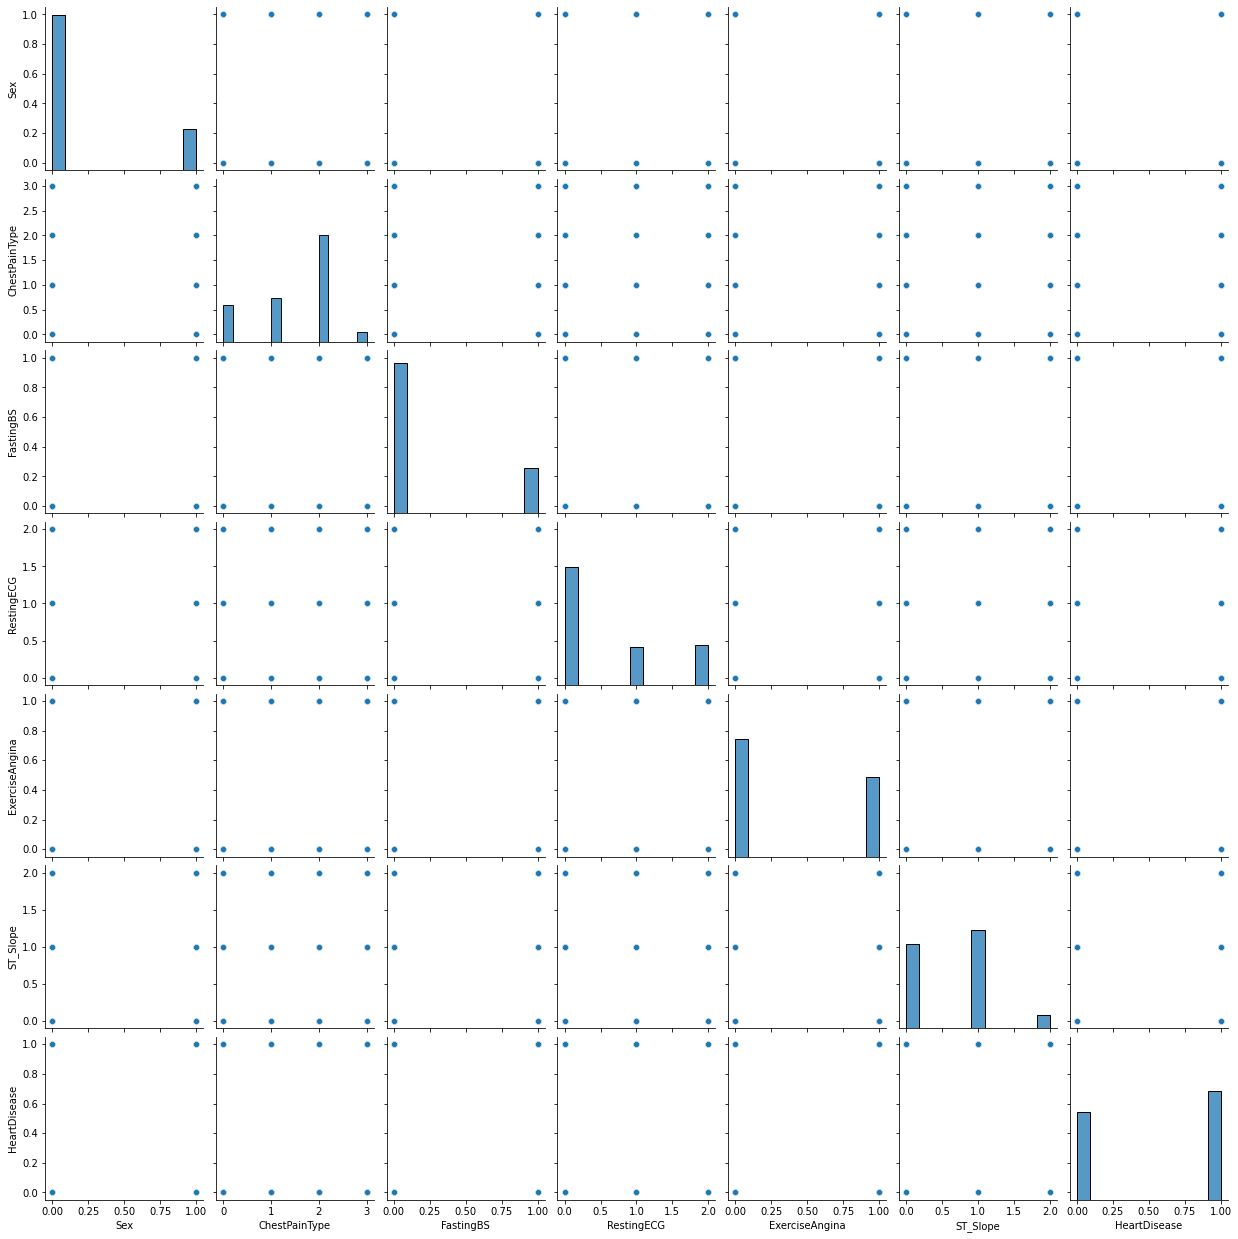

In [ ]:
sns.pairplot(heartData[catcols])

In [ ]:
heartData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,0,0,0.70,0.479270,0,0,0.788732,0,0.295455,0,0
1,0.428571,1,1,0.80,0.298507,0,0,0.676056,0,0.409091,1,1
2,0.183673,0,0,0.65,0.469320,0,1,0.267606,0,0.295455,0,0
3,0.408163,1,2,0.69,0.354892,0,0,0.338028,1,0.465909,1,1
4,0.530612,0,1,0.75,0.323383,0,0,0.436620,0,0.295455,0,0


### PLAIN DECISION TREE CLASSIFIER

In [ ]:
feature_cols = ['Age',
        'Sex',
        'ChestPainType',
        'RestingBP',
        'Cholesterol',
        'FastingBS',
        'RestingECG',
        'MaxHR',
        'ExerciseAngina',
        'Oldpeak',
        'ST_Slope']
X = heartData[feature_cols] # Features
y = heartData.HeartDisease # Target variable

#heartData_label_df = heartData['HeartDisease']
#heartData_feature_df = X

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

#### Hyper-Parameter Tuning and Cross-Validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

dt_pipe = Pipeline([
                     ('dt', DecisionTreeClassifier(random_state = 5))])
params = [{'max_depth': [3, 5, 7, 9],
         'min_samples_leaf': [2, 3, 5]}]
         
gs_dt = GridSearchCV(DecisionTreeClassifier(random_state = 5),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_dt.fit(X_train, y_train)
print(gs_dt.best_params_)
# find best model score
print(gs_dt.score(X_train, y_train))

{'max_depth': 3, 'min_samples_leaf': 2}
0.8613707165109035


#### Tree Construction

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
predictions = clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

predictions = gs_dt.predict(X_test)
predicted_probas = gs_dt.predict_proba(X_test)



print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.77      0.81      0.79       109
           1       0.87      0.84      0.85       167

    accuracy                           0.83       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.83      0.83      0.83       276

Predicted labels:  [1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1
 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0
 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0
 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0]
Accuracy:  0.8260869565217391


In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


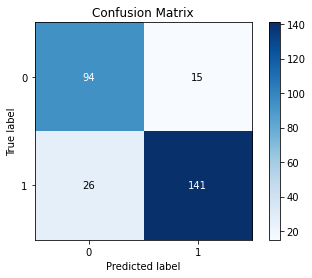

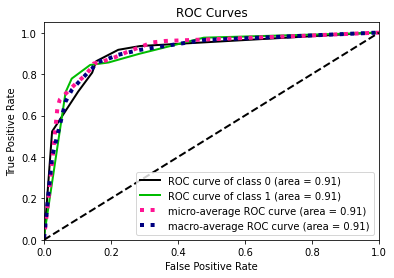

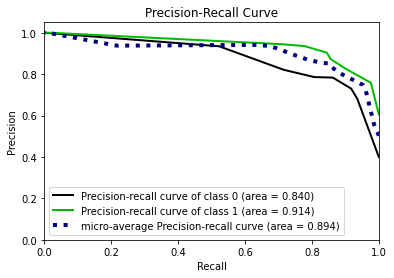

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt


skplt.metrics.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, predicted_probas)
skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
plt.show()

In [ ]:
!pip install graphviz
classes = y.unique()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


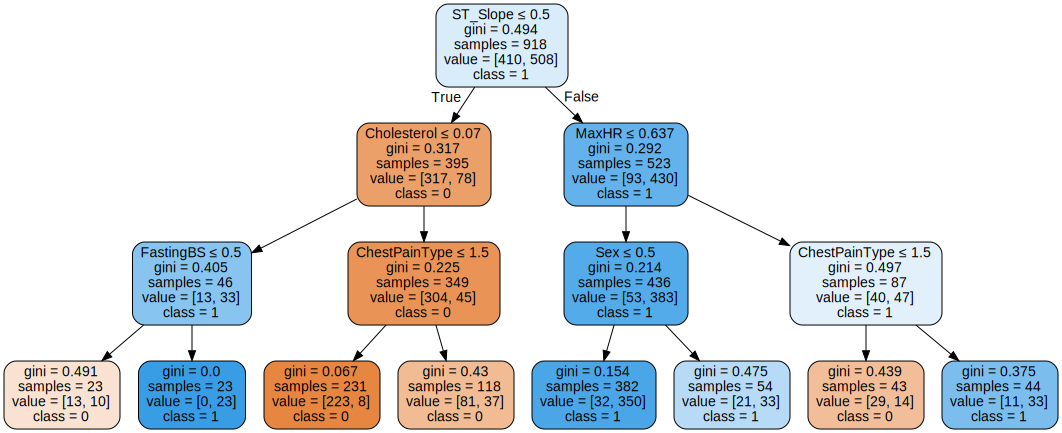

In [ ]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(gs_dt.best_estimator_, out_file=None, 
                     feature_names = feature_cols,class_names=['0','1'],
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
gs_dt.best_estimator_

Pipeline(steps=[('dt',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=2,
                                        random_state=5))])

### Adaboost

#### Hyper-Parameter Tuning and Cross-Validation

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

params = [{
          'n_estimators': [50, 100, 150, 200, 250, 300],
         'learning_rate': [ 0.001, 0.01, 1]}]
         
gs_ada = GridSearchCV(AdaBoostClassifier(random_state = 5),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_ada.fit(X_train,y_train)
print(gs_ada.best_params_)
# find best model score
print(gs_ada.score(X_train,y_train))

#adf = AdaBoostClassifier()

{'learning_rate': 1, 'n_estimators': 100}
0.8956386292834891


In [ ]:
predictions = gs_ada.predict(X_test)
predicted_probas = gs_ada.predict_proba(X_test)



print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.78      0.90      0.83       109
           1       0.93      0.83      0.88       167

    accuracy                           0.86       276
   macro avg       0.85      0.87      0.86       276
weighted avg       0.87      0.86      0.86       276

Predicted labels:  [1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1
 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1
 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0
 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0]
Accuracy:  0.8586956521739131


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


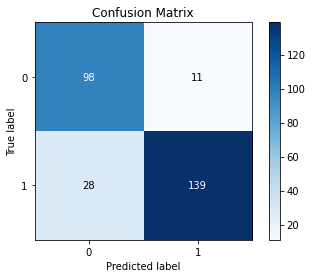

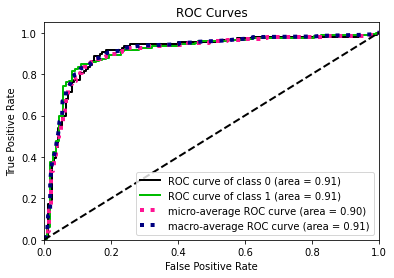

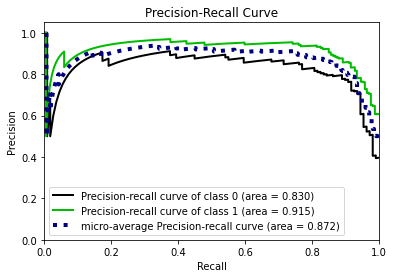

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, predicted_probas)
skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
plt.show()

### Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier



params = [{'n_estimators': [100, 500, 1000,2000],
         'max_depth': [3, 5, 9,15],
         'criterion' : ['gini', 'entropy']}]
         
gs_rf = GridSearchCV(RandomForestClassifier(random_state = 5),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_params_)
# find best model score
print(gs_rf.score(X_train, y_train))

#adf = AdaBoostClassifier()

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 1000}
0.9096573208722741


In [ ]:
predictions = gs_rf.predict(X_test)
predicted_probas = gs_rf.predict_proba(X_test)



print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.85      0.86      0.86       109
           1       0.91      0.90      0.91       167

    accuracy                           0.89       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.89      0.89      0.89       276

Predicted labels:  [1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1
 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1
 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0
 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0]
Accuracy:  0.8876811594202898


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


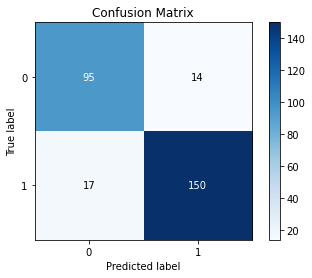

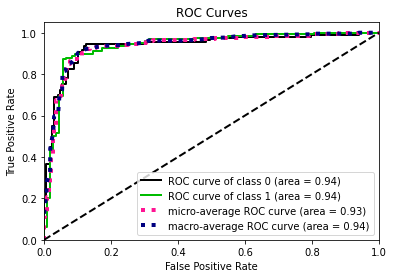

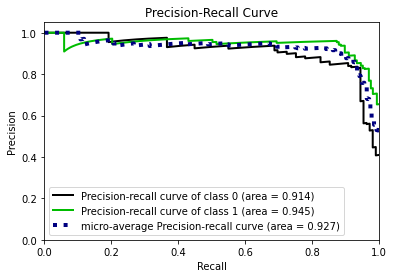

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, predicted_probas)
skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
plt.show()

### XGBoost

In [ ]:
import xgboost as xgb
import multiprocessing
xgb_model = xgb.XGBClassifier(n_jobs=multiprocessing.cpu_count() // 2)
gs_xgb = GridSearchCV(xgb_model, {'max_depth': [1,3, 5, 7,10],
                                   'n_estimators': [10,25,50, 100, 200],
                                  "learning_rate" : [0.1, .001]}, verbose=1,
                       n_jobs=2)
gs_xgb.fit(X_train, y_train)
print(gs_xgb.best_params_)
print(gs_xgb.score(X_train, y_train))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.9361370716510904


In [ ]:
predictions = gs_xgb.predict(X_test)
predicted_probas = gs_xgb.predict_proba(X_test)



print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.85      0.87      0.86       109
           1       0.91      0.90      0.91       167

    accuracy                           0.89       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.89      0.89      0.89       276

Predicted labels:  [1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1
 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1
 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0
 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0]
Accuracy:  0.8876811594202898


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


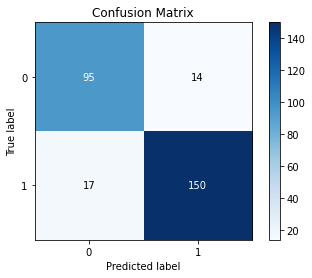

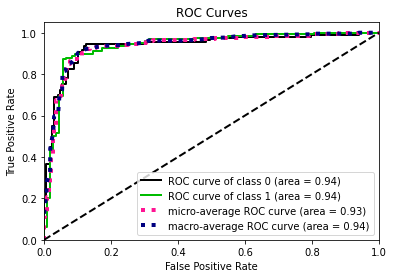

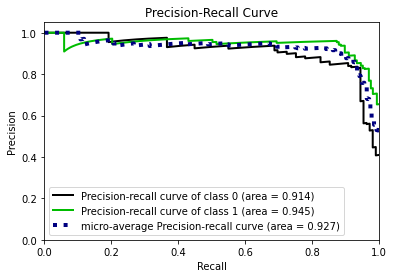

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, predicted_probas)
skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
plt.show()